In [42]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature, io, transform
from matplotlib import cm

%matplotlib inline

# Problem 1

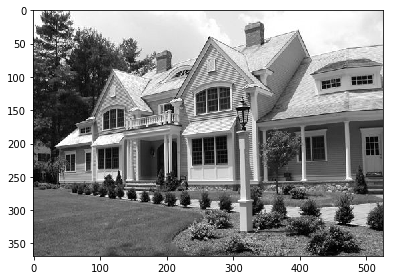

In [3]:
image = io.imread('house.jpg', as_grey=True)
io.imshow(image)

The image contains edges that separate big shapes.
- There are edges between the sky and the roof.
- The windows are definitely outlined very distinctly with edges.
- There are certain highlights on the house walls that would also be picked up as edges.

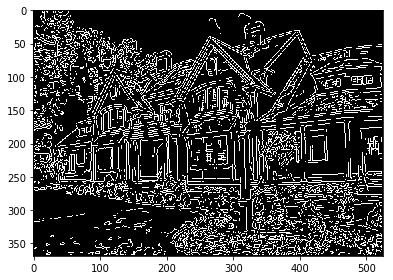

In [14]:
bw = feature.canny(image)
io.imshow(bw)

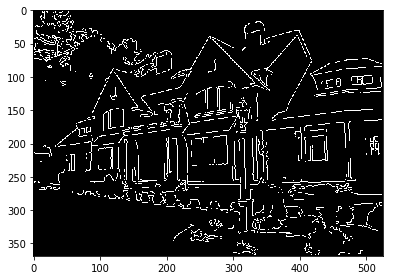

In [62]:
bw = feature.canny(image, low_threshold=.4, high_threshold=.9)
io.imshow(bw)

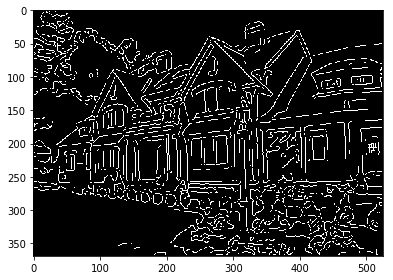

In [8]:
bw = feature.canny(image, sigma=2)
io.imshow(bw)

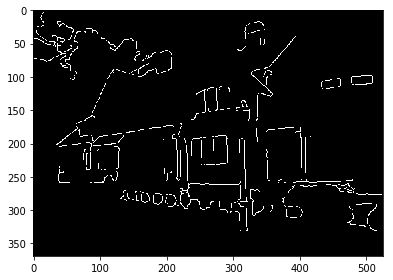

In [23]:
bw = feature.canny(image, sigma=2, low_threshold=.01, high_threshold=.8)
io.imshow(bw)

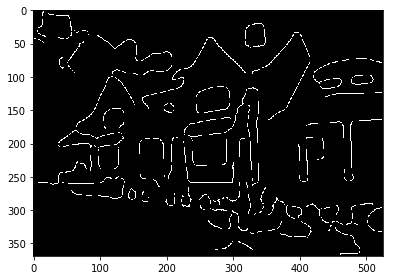

In [51]:
bw = feature.canny(image, sigma=5)
io.imshow(bw)

The adjustment of the Gaussian blur appears to pull out the most "important" edges.

# Problem 2

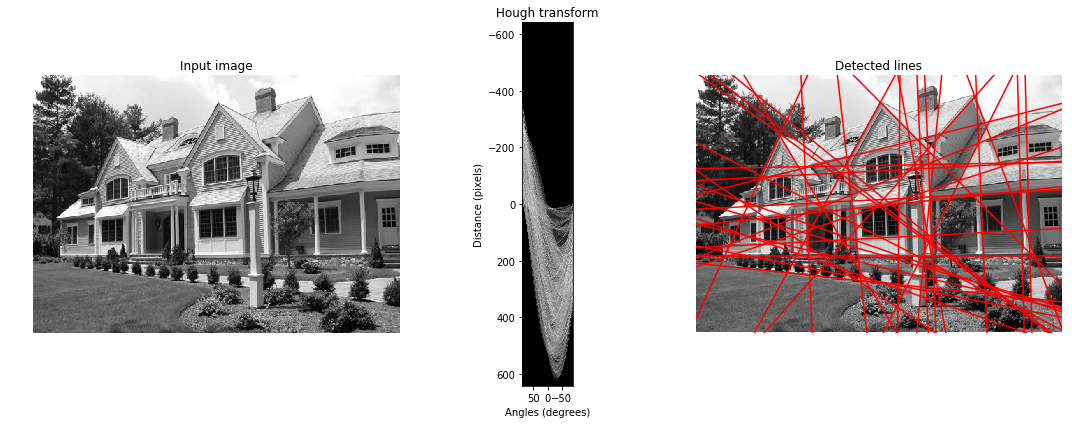

In [82]:
bw = feature.canny(image, sigma=5)
h, theta, d = transform.hough_line(bw)

fig, axes = plt.subplots(1, 3, figsize=(15, 6), subplot_kw={'adjustable': 'box-forced'})
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + h),
             extent = [np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap = cm.gray, aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
for _, angle, dist in zip(*transform.hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
    ax[2].plot((0, image.shape[1]), (y0, y1), '-r')
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()

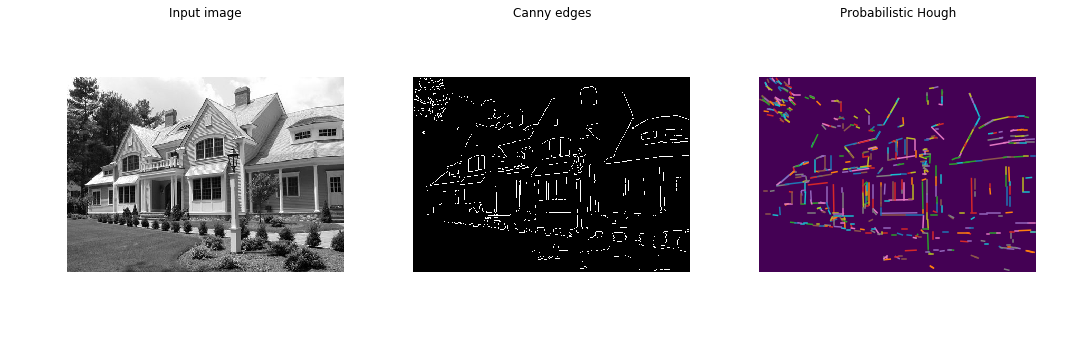

In [79]:
bw = feature.canny(image, sigma=1, low_threshold=.8, high_threshold=.9)

lines = transform.probabilistic_hough_line(bw, threshold=10, line_length=5, line_gap=3)

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(bw, cmap=cm.gray)
ax[1].set_title('Canny edges')
ax[1].set_axis_off()

ax[2].imshow(bw * 0)
for line in lines:
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_title('Probabilistic Hough')
ax[2].set_axis_off()


plt.tight_layout()
plt.show()

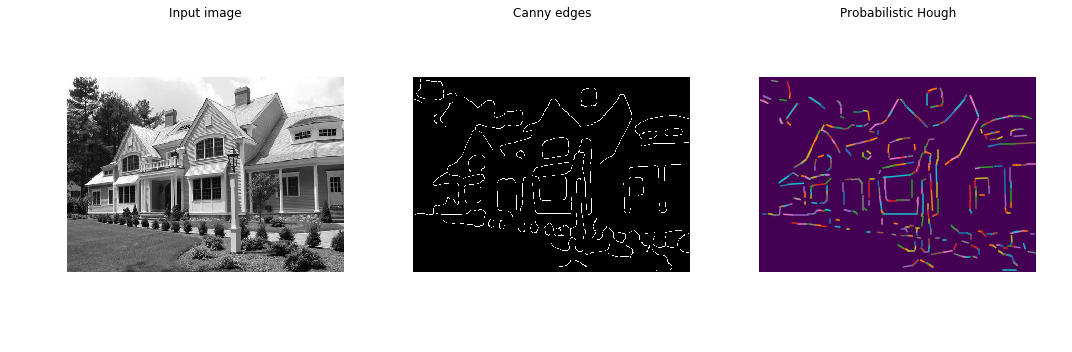

In [80]:
bw = feature.canny(image, sigma=5)

lines = transform.probabilistic_hough_line(bw, threshold=10, line_length=5, line_gap=3)

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(bw, cmap=cm.gray)
ax[1].set_title('Canny edges')
ax[1].set_axis_off()

ax[2].imshow(bw * 0)
for line in lines:
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_title('Probabilistic Hough')
ax[2].set_axis_off()


plt.tight_layout()
plt.show()

We picked up the following:
- Borders of windows
- Borders of rooves
- Edges of columns
- Edges of pavement

Certain edges such as in the roof, we see constant strong edges. However, around objects such as pavement, the edges are a bit broken.

# Problem 3

(a) : 4

(b) : 2

(c) : 5